# Открытие данных из файла и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

Выведем на экран основную информацию о данных

In [4]:
data_list = [df_calls, df_internet, df_messages, df_tariffs, df_users]

In [5]:
# информация о данных, первые 5 строк, поиск количества дубликатов
for data in data_list:
    data.info()
    display(data.head())
#    display(data.describe())
    display(data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


0

## Вывод

Описание данных:

Таблица users (информация о пользователях):
user_id — уникальный идентификатор пользователя\
first_name — имя пользователя\
last_name — фамилия пользователя\
age — возраст пользователя (годы)\
reg_date — дата подключения тарифа (день, месяц, год)\
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)\
city — город проживания пользователя\
tarif — название тарифного плана\

Таблица calls (информация о звонках):
id — уникальный номер звонка\
call_date — дата звонка\
duration — длительность звонка в минутах\
user_id — идентификатор пользователя, сделавшего звонок\

Таблица messages (информация о сообщениях):
id — уникальный номер сообщения\
message_date — дата сообщения\
user_id — идентификатор пользователя, отправившего сообщение\

Таблица internet (информация об интернет-сессиях):
id — уникальный номер сессии\
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)\
session_date — дата интернет-сессии\
user_id — идентификатор пользователя\

Таблица tariffs (информация о тарифах):
tariff_name — название тарифа\
rub_monthly_fee — ежемесячная абонентская плата в рублях\
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату\
messages_included — количество сообщений в месяц, включённых в абонентскую плату\
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)\
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)\
rub_per_message — стоимость отправки сообщения сверх тарифного пакета\
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)\

В данных отсутствуют дубликаты. Пропущенные значения имеются только в столбце churn_date таблицы users, что не является ошибкой, так как отсутствие сведений в соответствии с условием говорит о действии тарифа на момент выгрузки данных. Рассмотрим данные на предмет наличия ошибок, а также приведём к нужному типу.

# Подготовка данных

In [6]:
# срез df_users для прекративших действие тарифов
df_users.loc[df_users['churn_date'].isna() == False]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart
56,1056,73,2018-10-14,Иркутск,Радислав,Артемьев,2018-04-13,smart
62,1062,24,2018-12-09,Москва,Александр,Коршунов,2018-11-16,smart
63,1063,45,2018-12-11,Тула,Таира,Климова,2018-04-12,ultra
64,1064,55,2018-12-26,Якутск,Динара,Алфеева,2018-03-17,smart
65,1065,53,2018-12-09,Москва,Роза,Игнатова,2018-03-08,smart


In [7]:
# изменение сроковых значений к формату datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format = '%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format = '%Y-%m-%d')

In [8]:
display(df_calls.dtypes)
display(df_internet.dtypes)
display(df_messages.dtypes)
display(df_tariffs.dtypes)
df_users.dtypes

id                   object
call_date    datetime64[ns]
duration            float64
user_id               int64
dtype: object

Unnamed: 0               int64
id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

id                      object
message_date    datetime64[ns]
user_id                  int64
dtype: object

messages_included         int64
mb_per_month_included     int64
minutes_included          int64
rub_monthly_fee           int64
rub_per_gb                int64
rub_per_message           int64
rub_per_minute            int64
tariff_name              object
dtype: object

user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object

In [9]:
df_internet['Unnamed: 0'].value_counts()

0         1
99574     1
99594     1
99595     1
99596     1
         ..
49798     1
49799     1
49800     1
49801     1
149395    1
Name: Unnamed: 0, Length: 149396, dtype: int64

Удалим в таблице df_internet столбец 'Unnamed: 0', дублирующий её индексы.

In [10]:
df_internet = df_internet.drop('Unnamed: 0', axis=1)
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [11]:
# округление времени разговора пользователей в соответствии с политикой подсчёта минут оператором
df_calls['duration_rounded'] = df_calls['duration'].apply(np.ceil)
df_calls.head()

,id,call_date,duration,user_id,duration_rounded
0,1000_0,2018-07-25,0.00,1000,0.0
1,1000_1,2018-08-17,0.00,1000,0.0
2,1000_2,2018-06-11,2.85,1000,3.0
3,1000_3,2018-09-21,13.80,1000,14.0
4,1000_4,2018-12-15,5.18,1000,6.0


In [12]:
# создание столбца month (месяц в соответствии с session_date)
df_internet['month'] = df_internet['session_date'].dt.month
df_internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [13]:
# объём израсходованного интернет-трафика по месяцам для каждого пользователя
df_internet_pivot = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
df_internet_pivot

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
...                 ...
1498    10     20579.36
1499    9       1845.75
        10     17788.51
        11     17963.31
        12     13055.58

[3203 rows x 1 columns]

In [14]:
# округление интернет трафика пользователей в соответствии с политикой подсчёта минут оператором (в большую сторону по Гб)
df_internet_pivot['gb_used'] = df_internet_pivot['mb_used'].apply(lambda x:np.ceil(x/1024))

In [15]:
# изменение типа данных столбца mb_used на целочисленный
df_internet_pivot = df_internet_pivot.astype('int')
df_internet_pivot

mb_used  gb_used
user_id month                  
1000    5         2253        3
        6        23233       23
        7        14003       14
        8        14055       14
        9        14568       15
...                ...      ...
1498    10       20579       21
1499    9         1845        2
        10       17788       18
        11       17963       18
        12       13055       13

[3203 rows x 2 columns]

In [16]:
# сброс индекса в полученной сводной таблице
df_internet_pivot = df_internet_pivot.reset_index()
df_internet_pivot = df_internet_pivot.drop('mb_used', axis=1)
df_internet_pivot

,user_id,month,gb_used
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15
...,...,...,...
3198,1498,10,21
3199,1499,9,2
3200,1499,10,18
3201,1499,11,18


In [17]:
# создание столбца month (месяц в соответствии с call_date)
df_calls['month'] = df_calls['call_date'].dt.month
df_calls.head()

,id,call_date,duration,user_id,duration_rounded,month
0,1000_0,2018-07-25,0.00,1000,0.0,7
1,1000_1,2018-08-17,0.00,1000,0.0,8
2,1000_2,2018-06-11,2.85,1000,3.0,6
3,1000_3,2018-09-21,13.80,1000,14.0,9
4,1000_4,2018-12-15,5.18,1000,6.0,12


In [18]:
# количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя
df_calls_pivot = df_calls.pivot_table(index=['user_id', 'month'], values='duration_rounded', aggfunc=['count', 'sum'])
df_calls_pivot

count              sum
              duration_rounded duration_rounded
user_id month                                  
1000    5                   22            159.0
        6                   43            172.0
        7                   47            340.0
        8                   52            408.0
        9                   58            466.0
...                        ...              ...
1498    10                  41            247.0
1499    9                    9             70.0
        10                  68            449.0
        11                  74            612.0
        12                  69            492.0

[3174 rows x 2 columns]

In [19]:
# сброс индекса
df_calls_pivot = df_calls_pivot.reset_index()
df_calls_pivot

,user_id,month,count,sum
,,,duration_rounded,duration_rounded
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0
...,...,...,...,...
3169,1498,10,41,247.0
3170,1499,9,9,70.0
3171,1499,10,68,449.0


In [20]:
# создание столбца month (месяц в соответствии с message_date)
df_messages['month'] = df_messages['message_date'].dt.month
df_messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [21]:
# количество отправленных сообщений по месяцам для каждого пользователя
df_messages_pivot = df_messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc='count')
df_messages_pivot

message_date
user_id month              
1000    5                22
        6                60
        7                75
        8                81
        9                57
...                     ...
1498    10               42
1499    9                11
        10               48
        11               59
        12               66

[2717 rows x 1 columns]

In [22]:
# сброс индекса
df_messages_pivot = df_messages_pivot.reset_index()
df_messages_pivot

,user_id,month,message_date
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [23]:
# объединение полученных ранее сводных таблиц для помесячных действий пользователей (звонки, сообщения, интернет трафик)
df_merged = df_internet_pivot.merge(df_calls_pivot, on=['user_id', 'month'], how='outer')
df_merged = df_merged.merge(df_messages_pivot, on=['user_id', 'month'], how='outer')
df_merged

C:\PROGS\Anaconda\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(
C:\PROGS\Anaconda\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,user_id,month,gb_used,"(count, duration_rounded)","(sum, duration_rounded)",message_date
0,1000,5,3.0,22.0,159.0,22.0
1,1000,6,23.0,43.0,172.0,60.0
2,1000,7,14.0,47.0,340.0,75.0
3,1000,8,14.0,52.0,408.0,81.0
4,1000,9,15.0,58.0,466.0,57.0
...,...,...,...,...,...,...
3209,1273,11,NaN,45.0,272.0,29.0
3210,1273,12,NaN,41.0,260.0,39.0
3211,1377,2,NaN,23.0,179.0,2.0
3212,1392,2,NaN,2.0,13.0,3.0


In [24]:
df_merged = df_merged.sort_values('user_id', ascending=True)
df_merged

,user_id,month,gb_used,"(count, duration_rounded)","(sum, duration_rounded)",message_date
0,1000,5,3.0,22.0,159.0,22.0
1,1000,6,23.0,43.0,172.0,60.0
2,1000,7,14.0,47.0,340.0,75.0
3,1000,8,14.0,52.0,408.0,81.0
4,1000,9,15.0,58.0,466.0,57.0
...,...,...,...,...,...,...
3195,1498,7,8.0,23.0,175.0,20.0
3200,1499,10,18.0,68.0,449.0,48.0
3199,1499,9,2.0,9.0,70.0,11.0
3201,1499,11,18.0,74.0,612.0,59.0


In [25]:
# переименуем столбцы с мультииндексом в соответствующие им количество звонков count_calls и сумма израсходованных минут sum_minutes
df_merged = df_merged.rename(columns={('count','duration_rounded'): 'count_calls', ('sum','duration_rounded'): 'sum_minutes', 'message_date': 'messages'})
df_merged

,user_id,month,gb_used,count_calls,sum_minutes,messages
0,1000,5,3.0,22.0,159.0,22.0
1,1000,6,23.0,43.0,172.0,60.0
2,1000,7,14.0,47.0,340.0,75.0
3,1000,8,14.0,52.0,408.0,81.0
4,1000,9,15.0,58.0,466.0,57.0
...,...,...,...,...,...,...
3195,1498,7,8.0,23.0,175.0,20.0
3200,1499,10,18.0,68.0,449.0,48.0
3199,1499,9,2.0,9.0,70.0,11.0
3201,1499,11,18.0,74.0,612.0,59.0


In [26]:
# объединим полученную таблицу с данными df_users
df_merged = df_merged.merge(df_users, on='user_id', how='outer')
df_merged

,user_id,month,gb_used,count_calls,sum_minutes,messages,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,3.0,22.0,159.0,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,23.0,43.0,172.0,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,14.0,47.0,340.0,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,14.0,52.0,408.0,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,15.0,58.0,466.0,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1499,9.0,2.0,9.0,70.0,11.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart
3212,1499,11.0,18.0,74.0,612.0,59.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart
3213,1499,12.0,13.0,69.0,492.0,66.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart
3214,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


In [27]:
# отсортируем датафрейм по возрастанию user_id и обновим индексы
df_merged = df_merged.sort_values('user_id', ascending=True).reset_index(drop=True)
df_merged

,user_id,month,gb_used,count_calls,sum_minutes,messages,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,3.0,22.0,159.0,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,23.0,43.0,172.0,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,14.0,47.0,340.0,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,14.0,52.0,408.0,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,15.0,58.0,466.0,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,8.0,24.0,57.0,400.0,62.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
3212,1499,10.0,18.0,68.0,449.0,48.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart
3213,1499,9.0,2.0,9.0,70.0,11.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart
3214,1499,11.0,18.0,74.0,612.0,59.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart


In [28]:
# функция для определения платы по тарифу
def tariff_price(tariff):
    if tariff == 'ultra':
        return 1950
    else:
        return 550

In [29]:
# создание столбца tariff_price с данными ежемесячного платежа
df_merged['tariff_price'] = df_merged['tariff'].apply(tariff_price)
df_merged

,user_id,month,gb_used,count_calls,sum_minutes,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,tariff_price
0,1000,5.0,3.0,22.0,159.0,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
1,1000,6.0,23.0,43.0,172.0,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
2,1000,7.0,14.0,47.0,340.0,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
3,1000,8.0,14.0,52.0,408.0,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
4,1000,9.0,15.0,58.0,466.0,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,8.0,24.0,57.0,400.0,62.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,550
3212,1499,10.0,18.0,68.0,449.0,48.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,550
3213,1499,9.0,2.0,9.0,70.0,11.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,550
3214,1499,11.0,18.0,74.0,612.0,59.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,550


In [30]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [31]:
# функция для определения стоимости звонков сверх тарифного лимита
def revenue_calls(row):
    tariff = row['tariff']
    minutes = row['sum_minutes']
    if tariff == 'smart':
        if minutes > 500:
            return (minutes-500)*3
        else:
            return 0
    if tariff == 'ultra':
        if minutes > 3000:
            return (minutes-3000)*1
        else:
            return 0

In [32]:
# функция для определения стоимости сообщений сверх тарифного лимита
def revenue_messages(row):
    tariff = row['tariff']
    messages = row['messages']
    if tariff == 'smart':
        if messages > 50:
            return (messages-50)*3
        else:
            return 0
    if tariff == 'ultra':
        if messages > 1000:
            return (messages-1000)*1
        else:
            return 0

In [33]:
# функция для определения стоимости интернет трафика сверх тарифного лимита
def revenue_gb_used(row):
    tariff = row['tariff']
    gb_used = row['gb_used']
    if tariff == 'smart':
        if gb_used > 15:
            return (gb_used-15)*200
        else:
            return 0
    if tariff == 'ultra':
        if gb_used > 30:
            return (gb_used-30)*150
        else:
            return 0

In [34]:
# создание столбцов со стоимостью звонков, сообщений и интернет трафика сверх тарифного лимита помесячно для каждого пользователя
# создание столбца sum_revenue с помесячной выручкой с каждого пользователя
df_merged['revenue_calls'] = df_merged.apply(revenue_calls, axis=1)
df_merged['revenue_messages'] = df_merged.apply(revenue_messages, axis=1)
df_merged['revenue_gb_used'] = df_merged.apply(revenue_gb_used, axis=1)
df_merged['sum_revenue'] = df_merged['tariff_price'] + df_merged['revenue_calls'] + df_merged['revenue_messages'] + df_merged['revenue_gb_used']
df_merged.head()

,user_id,month,gb_used,count_calls,sum_minutes,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,tariff_price,revenue_calls,revenue_messages,revenue_gb_used,sum_revenue
0,1000,5.0,3.0,22.0,159.0,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950,0.0,0.0,0.0,1950.0
1,1000,6.0,23.0,43.0,172.0,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950,0.0,0.0,0.0,1950.0
2,1000,7.0,14.0,47.0,340.0,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950,0.0,0.0,0.0,1950.0
3,1000,8.0,14.0,52.0,408.0,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950,0.0,0.0,0.0,1950.0
4,1000,9.0,15.0,58.0,466.0,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950,0.0,0.0,0.0,1950.0


## Вывод

Подсчитана помесячная выручка для каждого пользователя, а также для каждого пользователя посчитаны по месяцам количество сделанных звонков и израсходованных минут, количество отправленных сообщений и израсходованного интернет трафика.

# Анализ данных

In [35]:
# сводная таблица с расчтом средних значений, дисперсии и стандартного отклонения по сообщениям, звонкам и интернет-трафику для пользователей разных тарифов
df_merged.pivot_table(index=['tariff'],values=['sum_minutes', 'messages', 'gb_used'], aggfunc=[np.mean, np.var, np.std])

mean                               var               \
          gb_used   messages sum_minutes    gb_used     messages   
tariff                                                             
smart   16.336176  38.716441  419.062978  32.923756   717.594201   
ultra   19.694359  61.161006  545.451104  94.146734  2109.659183   

                           std                         
         sum_minutes   gb_used   messages sum_minutes  
tariff                                                 
smart   35844.189551  5.737923  26.787949  189.325618  
ultra   94203.418396  9.702924  45.931026  306.925754

In [36]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Пользователи тарифа ultra в среднем в течение месяца расходуют больше минут разговоров, сообщений и интернет-трафика, чем пользователи тарифа smart. При этом для тарифа ultra характерны большие значения стандартных отклонений для всех видов услуг.

Пользователи тарифа ultra в месяц в среднем используют:\
от 10 до 29 Гб интернета (30 включено в тариф)\
от 15 до 107 сообщений (1000 включено в тариф)\
от 239 до 852 минут (3000 включено в тариф)

Пользователи тарифа smart:\
от 10 до 22 Гб интернета (15 включено в тариф)\
от 12 до 65 сообщений (50 включено в тариф)\
от 230 до 608 минут (500 включено в тариф)

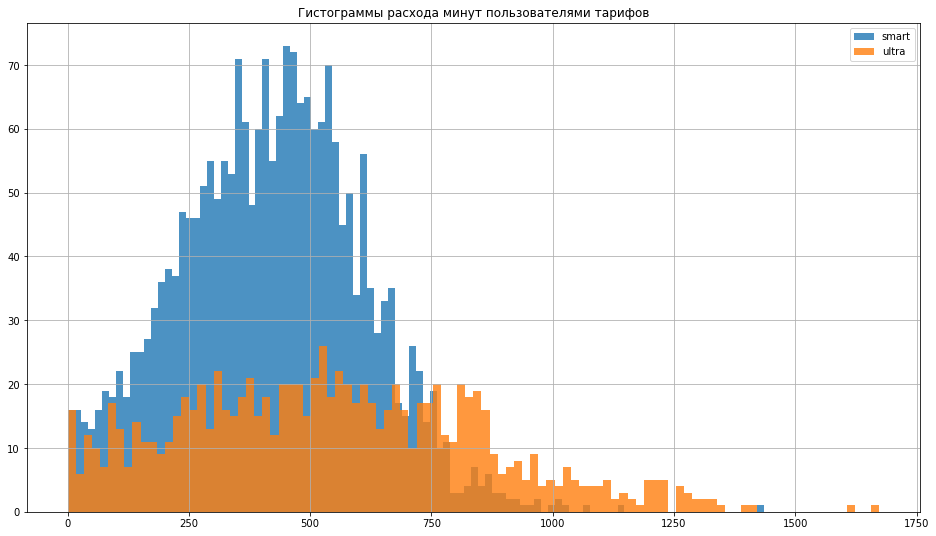

In [37]:
df_merged.query('tariff == "smart"')['sum_minutes'].hist(bins=100, label='smart', alpha=0.8, figsize=(16,9));
df_merged.query('tariff == "ultra"')['sum_minutes'].hist(bins=100, label='ultra', alpha=0.8);
plt.legend();
plt.title('Гистограммы расхода минут пользователями тарифов');

Гистограммы имеют вид нормальных распределений, скошенных вправо. Для тарифа ultra гистограмма не имеет такой выраженной вершины, как для тарифа smart. Значения распределены более равномерно, что обуславливается высокой величиной стандартного отклонения.

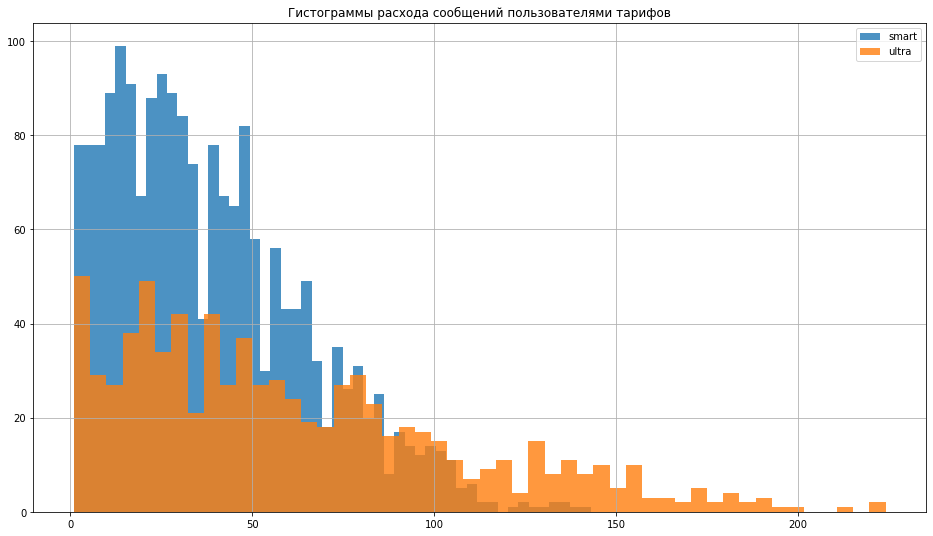

In [38]:
df_merged.query('tariff == "smart"')['messages'].hist(bins=50, label='smart', alpha=0.8, figsize=(16,9));
df_merged.query('tariff == "ultra"')['messages'].hist(bins=50, label='ultra', alpha=0.8);
plt.legend();
plt.title('Гистограммы расхода сообщений пользователями тарифов');

Гистограммы расхода сообщений пользователями тарифов имеют вид распределения Пуассона. Услуга сообщений в целом не обладает высокой востребованостью ни для одного из тарифов.\

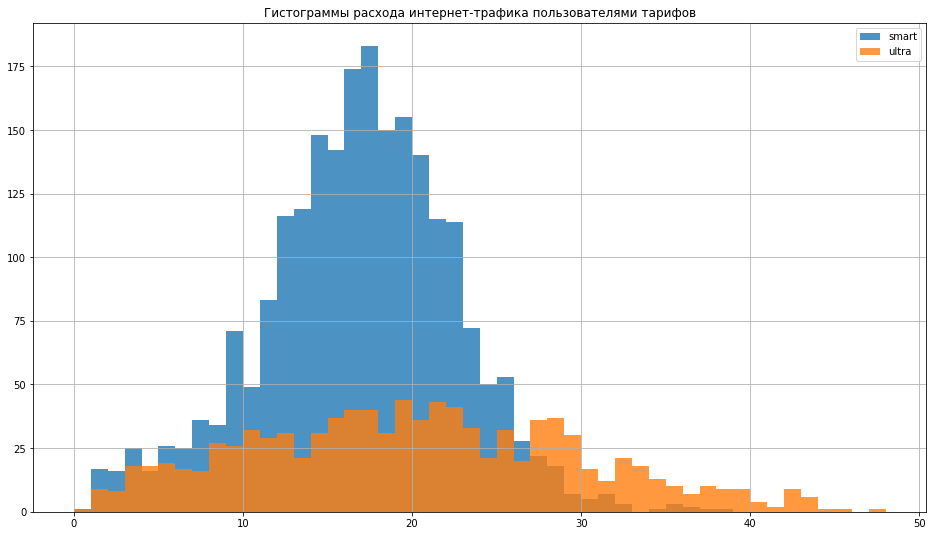

In [39]:
df_merged.query('tariff == "smart"')['gb_used'].hist(bins=[b for b in range(int(max(df_merged.gb_used)))], label='smart', alpha=0.8, figsize=(16,9));
df_merged.query('tariff == "ultra"')['gb_used'].hist(bins=[b for b in range(int(max(df_merged.gb_used)))], label='ultra', alpha=0.8);
plt.legend();
plt.title('Гистограммы расхода интернет-трафика пользователями тарифов');

Гистограммы имеют вид нормальных распределений. Боолее ярко выражено для тарифа smart. Для тарифа ultra, также как и в случае с расходом минут за счет высокой величины стандартного отклонения гистограмма не имеет ярко выраженной вершины.

## Вывод

Пользователи тарифа ultra в месяц в среднем используют:\
от 10 до 29 Гб интернета при среднем 19.7 Гб (30 включено в тариф)\
от 15 до 107 сообщений при среднем 61 (1000 включено в тариф)\
от 239 до 852 минут при среднем 545(3000 включено в тариф)

Пользователи тарифа smart:\
от 10 до 22 Гб интернета при среднем 16.34 Гб (15 включено в тариф)\
от 12 до 65 сообщений при среднем 39 (50 включено в тариф)\
от 230 до 608 минут при среднем 419 (500 включено в тариф)

По полученным распределениям и рассчетным данным можно сказать, что пользователи тарифа smart превышают установленные лимиты по услугам в рамках тарифа. При этом по минутам разговора и сообщениям в большинстве случаев этот лимит не превышается, а установленного лимита интернет трафика пользователям явно не хватает. Пользователи тарифа в месяц в среднем расходуют трафика больше, чем установлено оператором.
Пользователи тарифа ultra  в течение всего рассматриваемого периода времени (2018 год) ни разу не превысили установленные лимиты по минутам разговора и количеству сообщений. Установленного лимита интернет трафика в большинстве случаев хватает.

# Проверка гипотез

Для проверки гипотзы о различии средней выручки пользователей тарифов smart и ultra используем метод ttest_ind.

Нулевая гипотеза: средние выручки пользователей тарифов smart и ultra равны.\
Альтернативная гипотеза: средние выручки пользователей тарифов smart и ultra различаются.

Пороговое значение установим равным 5%.

In [40]:
# подсчет дисперсии выборок
print('Дисперсия выборки для тарифа smart', np.var(df_merged.loc[df_merged['tariff']=='smart'].sum_revenue))
print('Дисперсия выборки для тарифа ultra', np.var(df_merged.loc[df_merged['tariff']=='ultra'].sum_revenue))

Дисперсия выборки для тарифа smart 669430.4361979977
Дисперсия выборки для тарифа ultra 141244.31956107437


Дисперсии выборок не равны. equal_var=False.

In [41]:
alpha = 0.05
results = st.ttest_ind(df_merged.loc[df_merged['tariff']=='smart'].sum_revenue, df_merged.loc[df_merged['tariff']=='ultra'].sum_revenue, equal_var=False)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.927011394420941e-250
Отвергаем нулевую гипотезу


Таким образом, отвергнув нулевую гипотезу, подтверждаем альтернативную: средние выручки пользователей тарифов smart и ultra различаются.

Проверим другую гипотезу: средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.

Нулевая гипотеза: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.\
Альтернативная гипотеза: средняя выручка пользователей из Москвы и пользователей из других регионов отличаются.

Пороговое значение установим равным 5%.

In [42]:
df_merged['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [43]:
# подсчет дисперсии выборок
print('Дисперсия выборки для тарифа smart', np.var(df_merged.loc[df_merged['city']=='Москва'].sum_revenue))
print('Дисперсия выборки для тарифа ultra', np.var(df_merged.loc[df_merged['city']!='Москва'].sum_revenue))

Дисперсия выборки для тарифа smart 564710.711746727
Дисперсия выборки для тарифа ultra 653818.4925923556


In [44]:
alpha = 0.05
results = st.ttest_ind(df_merged.loc[df_merged['city']=='Москва'].sum_revenue, df_merged.loc[df_merged['city']!='Москва'].sum_revenue, equal_var=False)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5216952110000278
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза подтвердилась. Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

In [45]:
# количество пользователей разных тарифов
df_users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

In [46]:
# сводная таблица с расчтом выручки для пользователей разных тарифов и средней выручки с каждого пользователя соответствующего тарифа
df_merged.pivot_table(index=['tariff'],values=['sum_revenue'], aggfunc=['sum', 'mean'])

,sum,mean
,sum_revenue,sum_revenue
tariff,,
smart,2875901.0,1289.641704
ultra,2041050.0,2070.030426


In [47]:
# сводная таблица с расчтом выручки для пользователей разных тарифов из Москвы
df_merged.query('city == "Москва"').pivot_table(index=['tariff'],values=['sum_revenue'], aggfunc=['sum', 'mean'])

,sum,mean
,sum_revenue,sum_revenue
tariff,,
smart,478392.0,1239.357513
ultra,466650.0,2074.000000


In [48]:
# сводная таблица с расчтом выручки для пользователей разных тарифов из других регионов
df_merged.query('city != "Москва"').pivot_table(index=['tariff'],values=['sum_revenue'], aggfunc=['sum', 'mean'])

,sum,mean
,sum_revenue,sum_revenue
tariff,,
smart,2397509.0,1300.167570
ultra,1574400.0,2068.856767


## Вывод

После проверки двух гипотез установлено следующее:\
средние выручки пользователей тарифов smart и ultra различаются;\
средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

# Общий вывод

* Пользователи тарифа ultra не используют полный объем включенных услуг по минутам разговора и сообщениям, а также большинство укладывается в установленный лимит интернет трафика.
* Пользователи тарифа smart зачастую, наоборот, не укладываются в установленные тарифом лимиты по всем видам услуг.
* Клиенты из Москвы и других регионов по показателю средней выручки не отличаются.
* Количество пользоваталей тарифа smart 351 человек, а тарифа ultra - 149.
* Пользователи smart приносят большую выручку при базовой стоимости тарифа в 3.5 раза меньше чем установлена для тарифа ultra.

Таким образом при планировании рекламного бюджета следует ориентироваться на пользователей тарифа smart. При этом следует отметить, что тарифы не являются оптимальными с точки зрения базового объема услуг. С учетом наличия немалой доли пользователей тарифа ultra, абонентская плата которые существенно выше, имеет смысл оптимизировать существующие тарифы, либо добавить третий, промежуточный, на который могли бы перейти пользователи тарифа smart, у которых есть запрос на больший объем услуг (в частности, интернет трафика), считающие базовую стоимость тарифа ultra избыточно высокой.